In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:

data = pd.read_csv("zomato.csv")

In [3]:
data.shape

(51717, 17)

In [4]:
data.columns.to_list()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

In [5]:
data.rename(columns ={'approx_cost(for two people)':'approx_cost','listed_in(city)':'area'},inplace=True)

In [6]:
data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [7]:
data.drop(['url', 'address','menu_item', 'reviews_list', 'phone', 'listed_in(type)'], axis = 1, inplace=True,)

In [8]:
df=data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   dish_liked    23639 non-null  object
 8   cuisines      51672 non-null  object
 9   approx_cost   51371 non-null  object
 10  area          51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [9]:

df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
df['rate'] =  df['rate'].str.replace("/5", "")
df['rate'] =  df['rate'].str.replace("nan", "NaN")
df['rate'] =  df['rate'].str.replace("NEW", "NaN")
df['rate'] =  df['rate'].str.replace("-", "NaN")
df['rate'] =  df['rate'].str.replace(" /5", "")
df['rate'] =  df['rate'].fillna(np.nan)
df['rate'] =  df['rate'].str.replace(" ", "")

In [11]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

Lets check Approx cost

In [12]:
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [13]:
df['approx_cost']=df['approx_cost'].str.replace(",","")
df['approx_cost']=df['approx_cost'].str.replace("nan","NaN")
df['approx_cost']=df['approx_cost'].fillna('NaN')

In [14]:
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'NaN', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [15]:
df['approx_cost']=df['approx_cost'].astype(float)
df['rate']=df['rate'].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   dish_liked    23639 non-null  object 
 8   cuisines      51672 non-null  object 
 9   approx_cost   51371 non-null  float64
 10  area          51717 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.3+ MB


data description


In [17]:
df.describe()

,rate,votes,approx_cost
count,41665.000000,51717.000000,51371.000000
mean,3.700449,283.697527,555.431566
std,0.440513,803.838853,438.850728
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


checking null values


In [18]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
dish_liked      28078
cuisines           45
approx_cost       346
area                0
dtype: int64

In [19]:
(df.isnull().sum()/df.shape[0])*100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.436549
votes            0.000000
location         0.040606
rest_type        0.438927
dish_liked      54.291626
cuisines         0.087012
approx_cost      0.669026
area             0.000000
dtype: float64

In [20]:
df=df[df["location"].notna()]
df=df[df["rest_type"].notna()]
df=df[df["cuisines"].notna()]
df=df[df["approx_cost"].notna()]

In [21]:
df.isna().sum()

name                0
online_order        0
book_table          0
rate             9885
votes               0
location            0
rest_type           0
dish_liked      27713
cuisines            0
approx_cost         0
area                0
dtype: int64

In [22]:
df["rate"].describe()

count    41263.000000
mean         3.702011
std          0.439985
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [23]:
q1=df["rate"].quantile(0.25)
q3=df["rate"].quantile(0.75)
xyz=q3-q1
lower_range=q1-(1.5*xyz)
upper_range=q3+(1.5*xyz)
outliers=len(df[(df['rate']<lower_range)| (df['rate']>upper_range)])
print("Number Of rows having Outliers : ",outliers)

Number Of rows having Outliers :  183


In [24]:
df['rate']=df['rate'].fillna(df['rate'].median())
df.isna().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
dish_liked      27713
cuisines            0
approx_cost         0
area                0
dtype: int64

In [25]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!="O"]
print("There are {} numerical features and there names are {}".format(len(numerical_features), numerical_features))

There are 3 numerical features and there names are ['rate', 'votes', 'approx_cost']


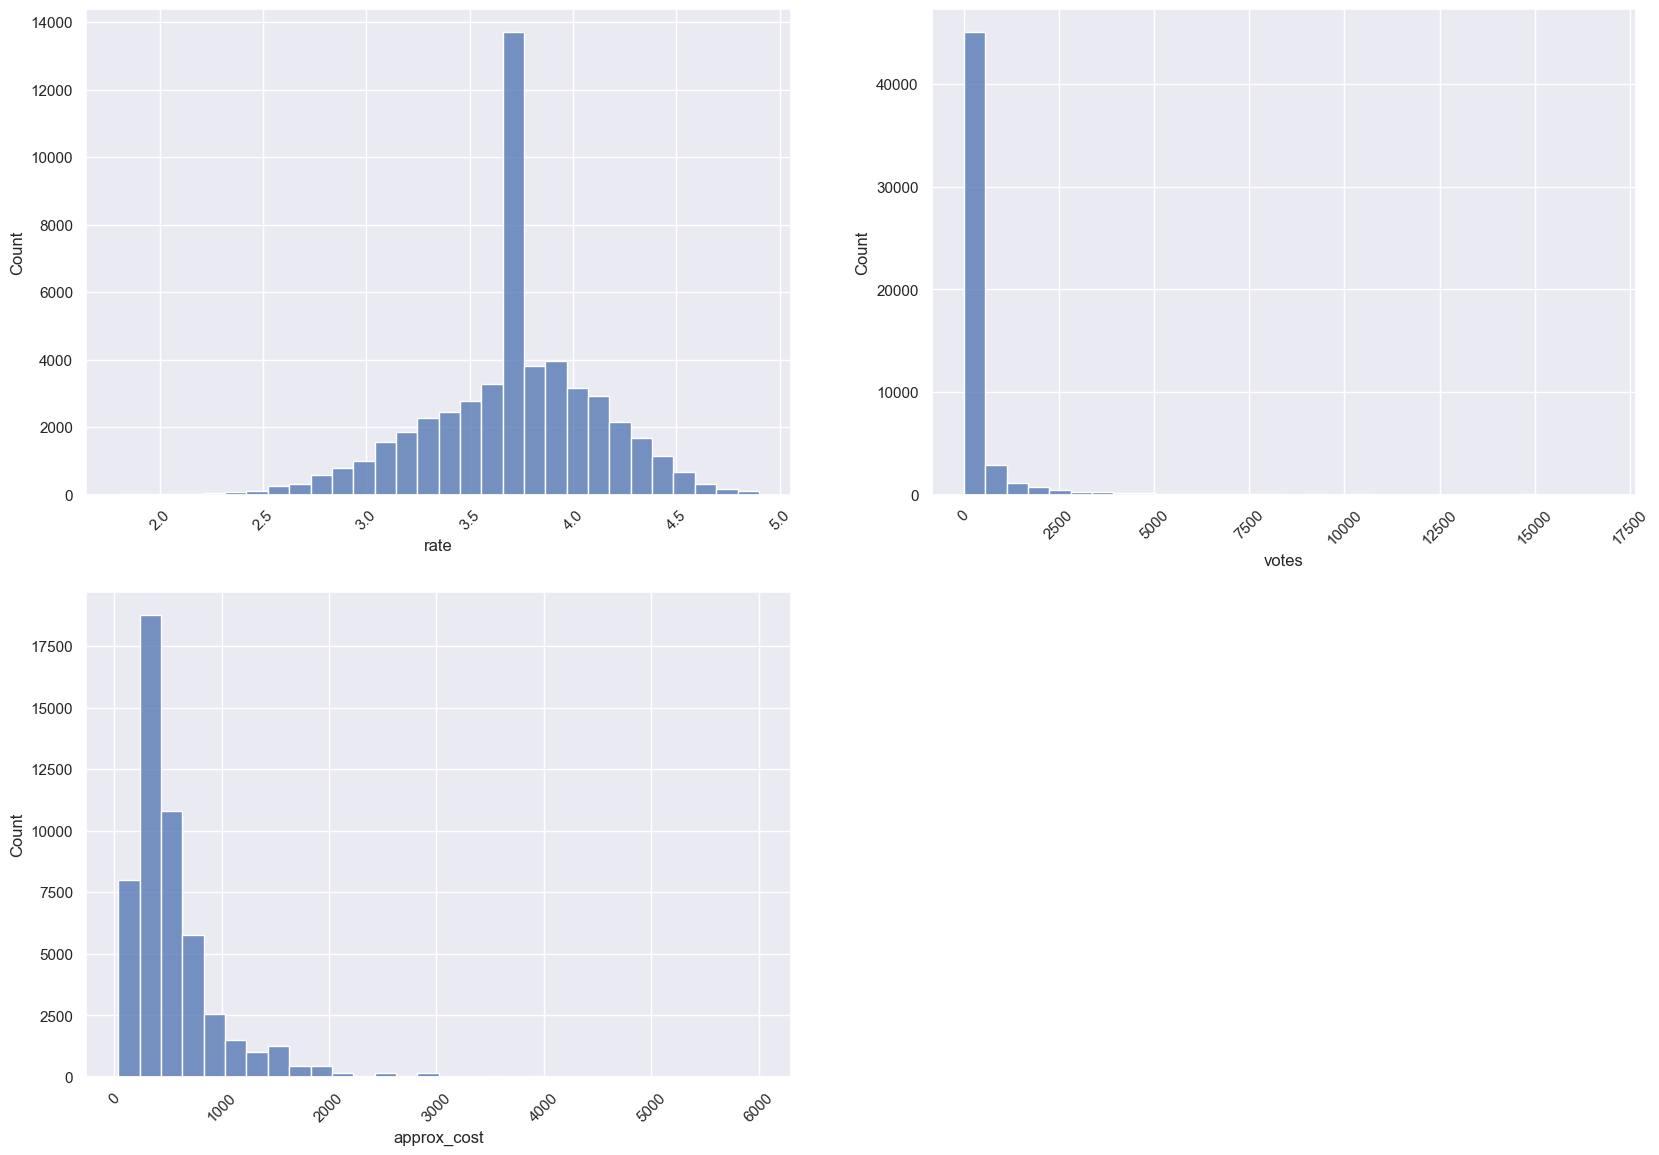

In [26]:
plt.figure(figsize=(20,150))
for i in enumerate(numerical_features):
    plt.subplot(20,2,i[0]+1)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.histplot(data=df,x=i[1],bins=30)
    plt.xticks(rotation=45)

In [27]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

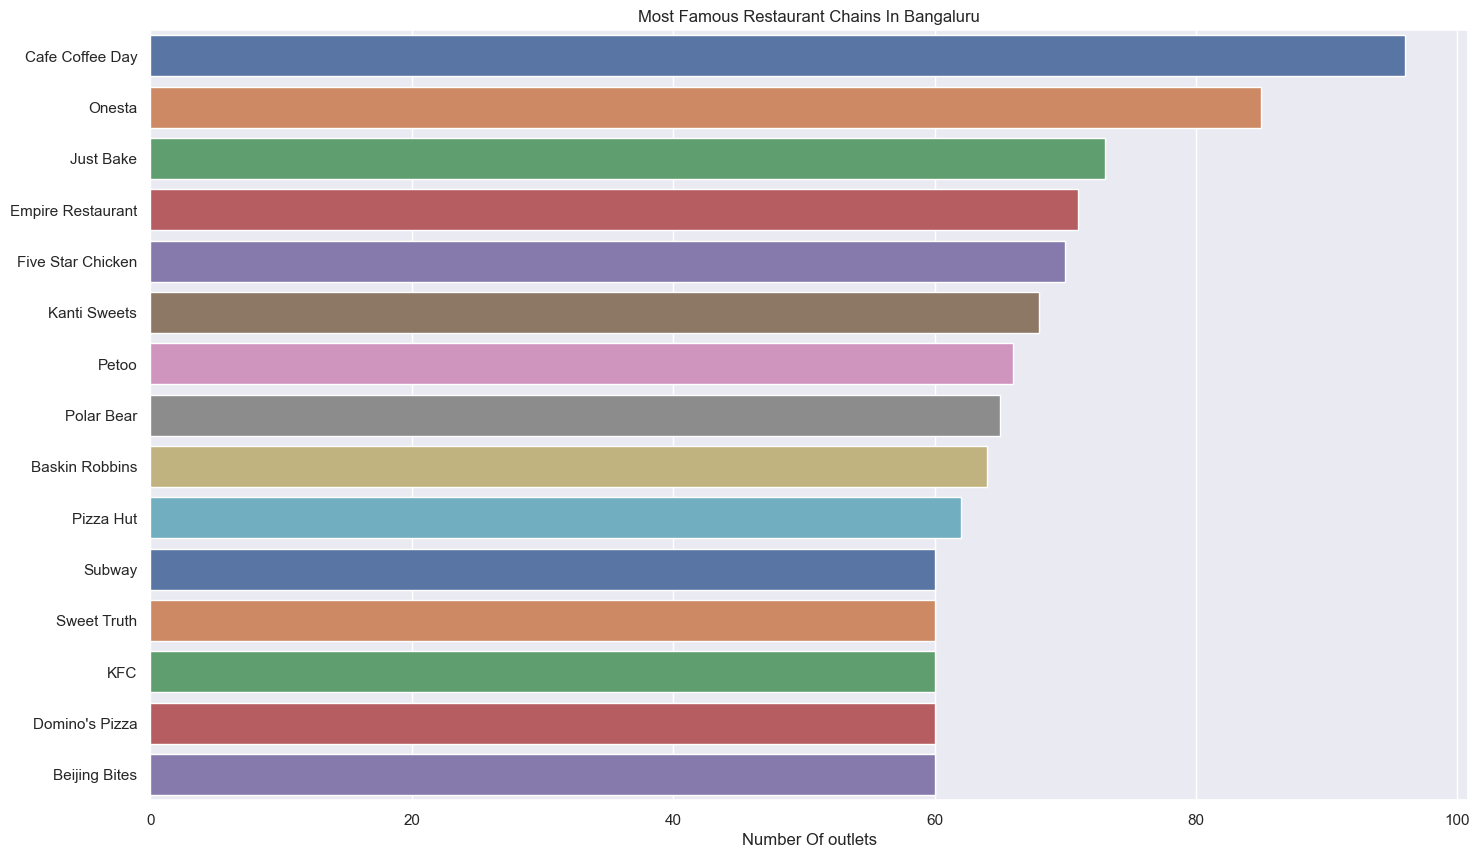

In [28]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:15]
sns.barplot(x=chains,y=chains.index,palette="deep")
plt.title("Most Famous Restaurant Chains In Bangaluru")
plt.xlabel("Number Of outlets")
plt.show()

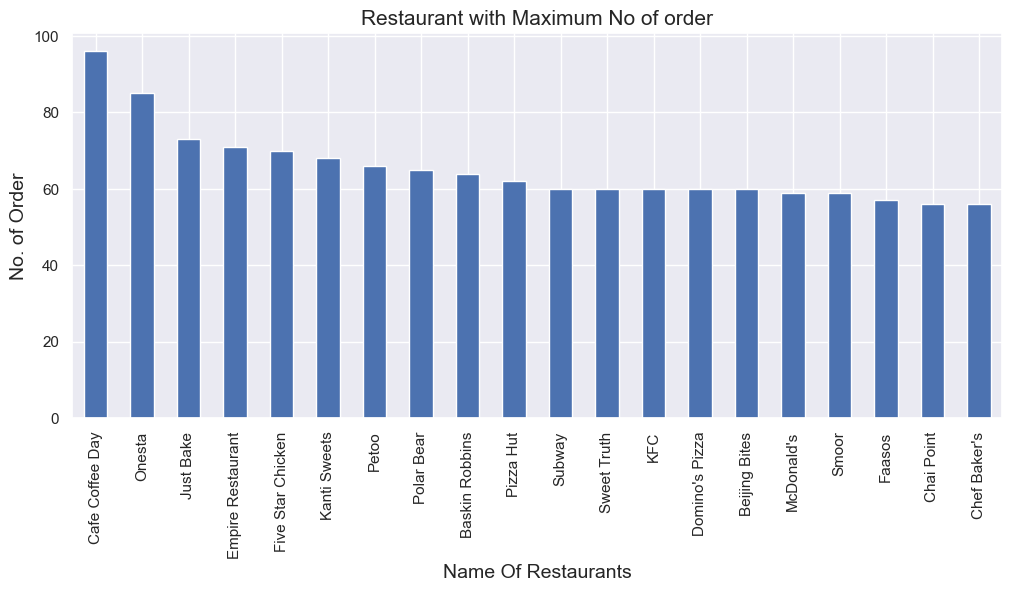

In [29]:
plt.figure(figsize=(12,5))
data=df['name'].value_counts()[:20]
data.plot(kind='bar')
plt.xlabel('Name Of Restaurants',size=14)
plt.ylabel("No. of Order",size=14)
plt.title("Restaurant with Maximum No of order" ,fontsize=15)
plt.show()

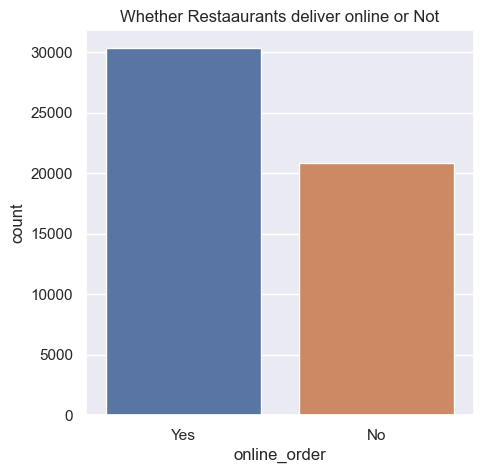

In [30]:
sns.countplot(data=df,x=df['online_order'])
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title("Whether Restaaurants deliver online or Not")
plt.show()

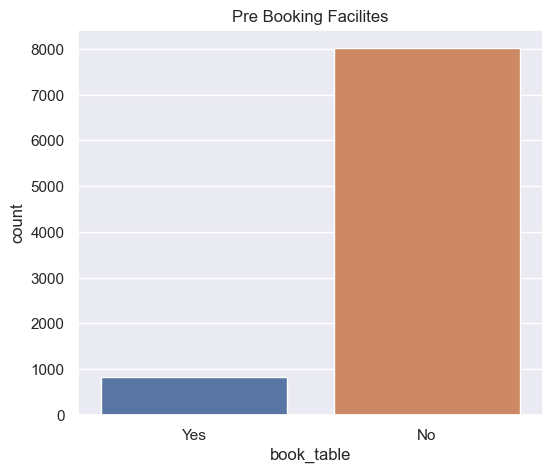

In [31]:
data=df[['name','book_table']].drop_duplicates()

plt.figure(figsize=(6,5))
fx=sns.countplot(x="book_table",data=data).set_title("Pre Booking Facilites",fontsize=12)
plt.show()

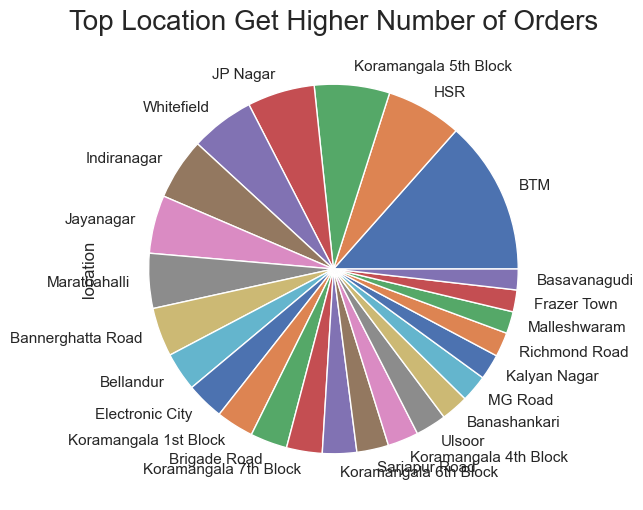

In [32]:
plt.figure(figsize=(12,6))
data=df.location.value_counts()[0:25]
data.plot(kind="pie")
plt.title("Top Location Get Higher Number of Orders",size=20)
plt.show()

<Axes: xlabel='rate', ylabel='Density'>

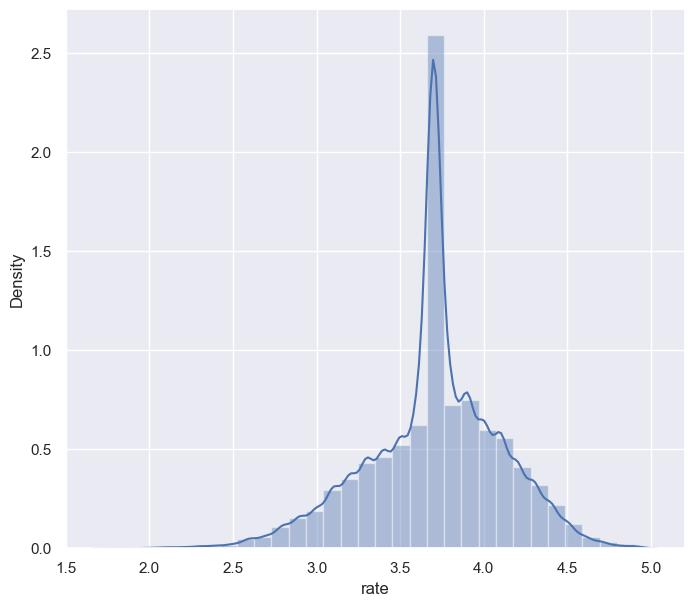

In [33]:
plt.figure(figsize=(8,7))
sns.distplot(df['rate'],bins=30)

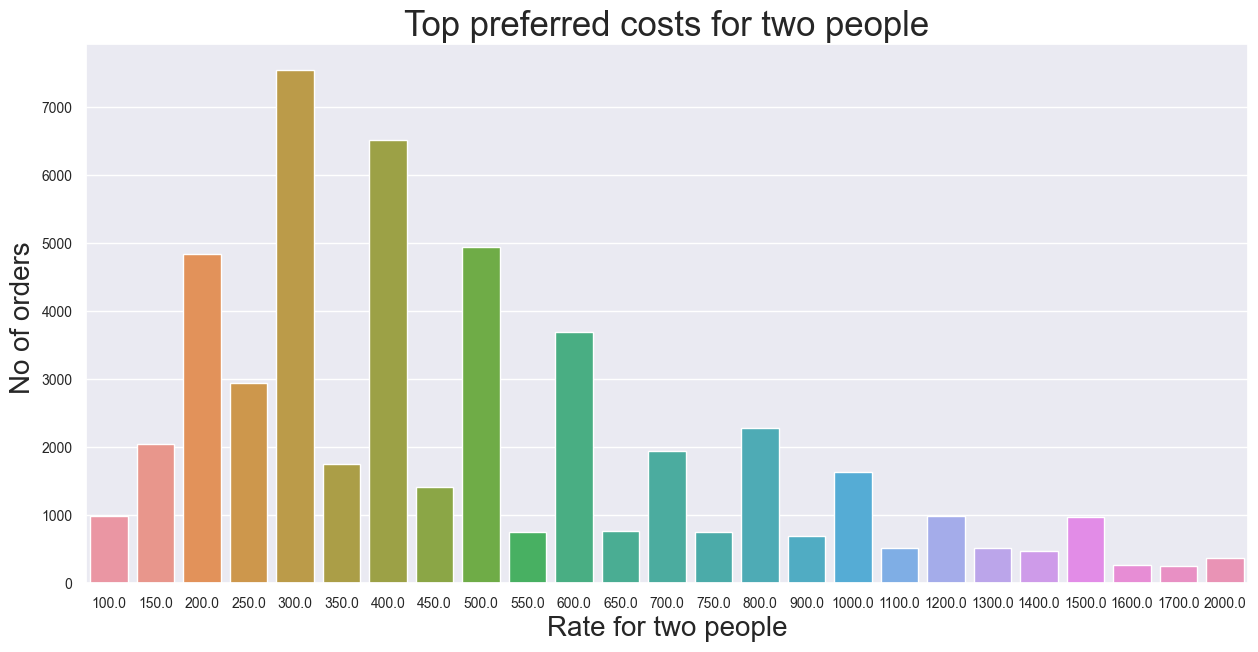

In [34]:
data=pd.DataFrame(df["approx_cost"].value_counts().reset_index()[:25])
data.columns=['approx_cost','count']
data=data.set_index('approx_cost')
plt.figure(figsize=(15,7))
sns.barplot(x=data.index,y=data['count'])
plt.xlabel("Rate for two people",size=20)
plt.ylabel("No of orders ",size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title("Top preferred costs for two people",size=25)
plt.show()

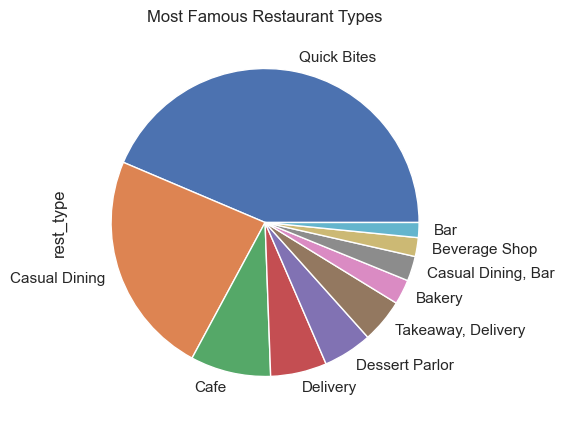

In [35]:
plt.figure(figsize=(12,5))
abc=df.rest_type.value_counts()[:10]
abc.plot(kind="pie")
plt.title("Most Famous Restaurant Types")
plt.show()

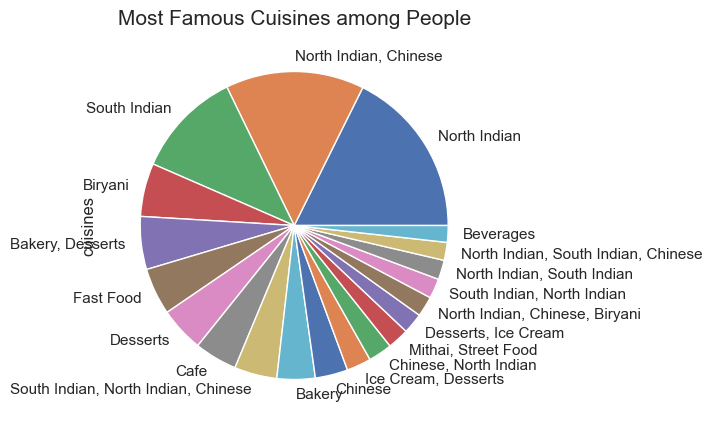

In [36]:
plt.figure(figsize=(12,5))
xyz=df.cuisines.value_counts()[:20].plot(kind="pie")
plt.title("Most Famous Cuisines among People",fontsize=15)
plt.show()

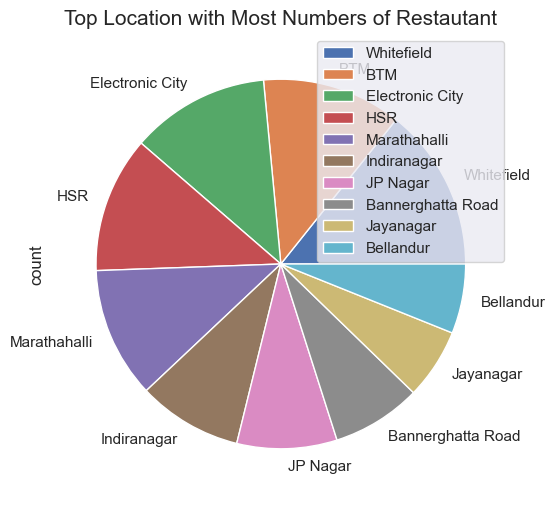

In [37]:
loc =pd.DataFrame(df.groupby(by='location')['name'].nunique())
loc.columns=['count']
loc.sort_values(by='count',ascending=False,inplace=True)
plt.rcParams['figure.figsize']=(8,6)
ax=loc[0:10].plot(kind='pie',subplots=True)
plt.title("Top Location with Most Numbers of Restautant",size=15)
plt.show()

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'rate'), Text(0, 1.5, 'votes'), Text(0, 2.5, 'approx_cost')])

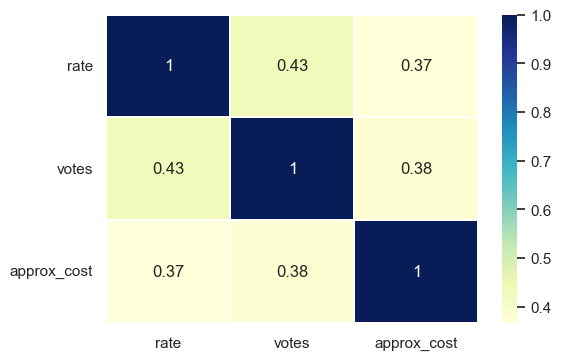

In [38]:


plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu",annot=True)
plt.yticks(rotation=0)

In [39]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Banashankari


In [40]:
df.online_order[df.online_order=="Yes"]=1
df.online_order[df.online_order=="No"]=0
df.book_table[df.book_table=="Yes"]=1
df.book_table[df.book_table=='No']=0

In [41]:
df.head()

df['rest_type'].value_counts()

Quick Bites                   19046
Casual Dining                 10273
Cafe                           3687
Delivery                       2578
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [42]:
rest_df = pd.DataFrame(df['rest_type'])
rts = list(rest_df.rest_type.str.split(", "))
unique_rts = list(set([rt for sub_list in rts for rt in sub_list]))

for rt in unique_rts:
    rest_df[rt] = int(0)
rest_df.head()

In [43]:
count = 0
for i in rts:
    rest_df.loc[count, i] = int(1)
    count+=1

In [44]:
rest_df.head()

df['rest_type'].value_counts()

In [45]:
rest_df.drop(['rest_type'],axis=1,inplace=True)
rest_df.head()

In [46]:
cuisines_df = pd.DataFrame(df['cuisines'])
cuisines = list(cuisines_df.cuisines.str.split(", "))
unique_cuisines = list(set([cs for sub_list in cuisines for cs in sub_list]))
unique_cuisines.remove("Cafe") 
unique_cuisines.remove("Bakery")

for cn in unique_cuisines:
    cuisines_df[cn] = 0   
    
cuisines_df.head()

In [47]:
correct_cn = []
for i in cuisines:
    if "Cafe" in i:
        i.remove("Cafe") 
    if "Bakery" in i:
        i.remove("Bakery")
    correct_cn.append(list(set(i)))
    
    count = 0
for i in correct_cn:
    cuisines_df.loc[count, i] = int(1)
    count+=1
    
    
cuisines_df.head()

In [48]:
cuisines_df.drop(['cuisines'], axis = 1, inplace=True)
cuisines_df.head()

df['rest_type'].value_counts()

In [49]:
location_df = df['location']
location_df = pd.get_dummies(location_df)
location_df.head()

In [50]:
area_df = df['area']
area_df = pd.get_dummies(area_df)
area_df.head()

In [51]:
data_with_area = pd.concat([df, rest_df, cuisines_df, area_df], axis = 1)
data_with_area.head()

df['rest_type'].value_counts()

In [52]:
data_with_location = pd.concat([df, rest_df, cuisines_df, location_df], axis=1)
data_with_location.head()
data_with_area = pd.concat([df, rest_df, cuisines_df, area_df], axis = 1)
data_with_area.head()
data_with_location.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis = 1, inplace=True)
data_with_area.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis=1, inplace=True)
print(data_with_location.columns[200:])


In [53]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost,area
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Banashankari


In [54]:
print(df['area'].unique())
s=pd.DataFrame({'name':df['area'].unique()})
s.head()

['Banashankari' 'Bannerghatta Road' 'Basavanagudi' 'Bellandur'
 'Brigade Road' 'Brookefield' 'BTM' 'Church Street' 'Electronic City'
 'Frazer Town' 'HSR' 'Indiranagar' 'Jayanagar' 'JP Nagar' 'Kalyan Nagar'
 'Kammanahalli' 'Koramangala 4th Block' 'Koramangala 5th Block'
 'Koramangala 6th Block' 'Koramangala 7th Block' 'Lavelle Road'
 'Malleshwaram' 'Marathahalli' 'MG Road' 'New BEL Road' 'Old Airport Road'
 'Rajajinagar' 'Residency Road' 'Sarjapur Road' 'Whitefield']


,name
0,Banashankari
1,Bannerghatta Road
2,Basavanagudi
3,Bellandur
4,Brigade Road


In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.location = le.fit_transform(df.location)
# x=pd.DataFrame(data['location'],df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.dish_liked = le.fit_transform(df.dish_liked)
# df.type = le.fit_transform(df.type)
df.area = le.fit_transform(df.area)

In [56]:
s['value']=df.area.unique()
print(s)
s.to_csv('valuse.csv')

                     name  value
0            Banashankari      1
1       Bannerghatta Road      2
2            Basavanagudi      3
3               Bellandur      4
4            Brigade Road      5
5             Brookefield      6
6                     BTM      0
7           Church Street      7
8         Electronic City      8
9             Frazer Town      9
10                    HSR     10
11            Indiranagar     11
12              Jayanagar     13
13               JP Nagar     12
14           Kalyan Nagar     14
15           Kammanahalli     15
16  Koramangala 4th Block     16
17  Koramangala 5th Block     17
18  Koramangala 6th Block     18
19  Koramangala 7th Block     19
20           Lavelle Road     20
21           Malleshwaram     22
22           Marathahalli     23
23                MG Road     21
24           New BEL Road     24
25       Old Airport Road     25
26            Rajajinagar     26
27         Residency Road     27
28          Sarjapur Road     28
29        

In [57]:
y = df['rate']
X=df
X.drop(columns=['rate','name'],axis=1,inplace=True)

In [58]:
X.head()

,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost,area
0,1,1,775,1,27,3628,2145,800.0,1
1,1,0,787,1,27,2950,947,800.0,1
2,1,0,918,1,22,1409,761,800.0,1
3,0,0,88,1,78,2752,2539,300.0,1
4,0,0,166,4,27,3435,2174,600.0,1


In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=10)

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(x_train,y_train)
y_predict=RF_Model.predict(x_test)
r2_score(y_test,y_predict)

0.8593213219602711

In [61]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor()

In [62]:
DT_model.fit(x_train,y_train)
prediction=DT_model.predict(x_test)

In [63]:
r2_score(y_test,prediction)

0.853521151905474

In [64]:
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)


In [65]:
ET_Model.fit(x_train,y_train)
y_predict=ET_Model.predict(x_test)
r2_score(y_test,y_predict)

0.9365431495804027

In [66]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.03151919734984863
Mean Squared Error: 0.009850087621410234
Root Mean Squared Error: 0.0992476076357019


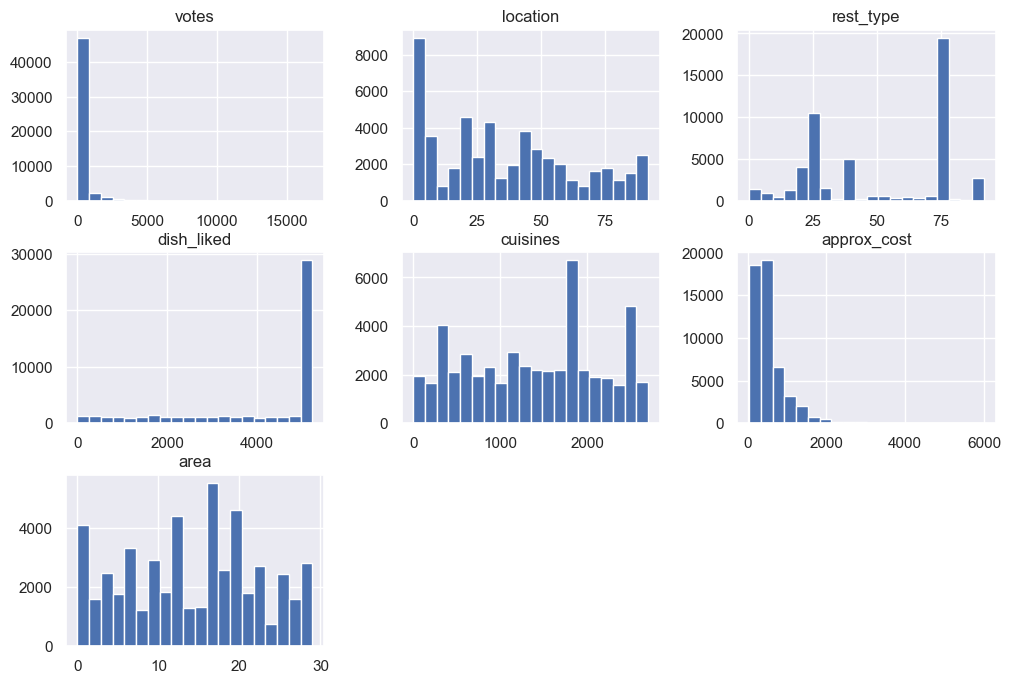

In [67]:

df.hist(figsize=(12,8),bins=20)
plt.show()


In [68]:
import joblib
joblib.dump(ET_Model,'model')
# model=joblib.load('mode_joblib_gr')


['model']

In [69]:
#Lets Predicts on some random value
print(ET_Model.predict([[1,1,775,1,27,3600,2500,1000,11]]),'star rating')

[4.1375] star rating
